<a href="https://colab.research.google.com/github/AKSHAYA8219/Intro-to-Machine-Learning/blob/master/CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!git clone https://github.com/AKSHAYA8219/ai-ml-assignments.git

fatal: destination path 'ai-ml-assignments' already exists and is not an empty directory.


In [0]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('ai-ml-assignments')
from utils import utils

In [0]:
def sigmoid(z):
    
    # Implement the sigmoid function
    #    z: A set of values whose sigmoid needs to be computed and stored in the variable s
    # Return value: 
    #    s: sigmoid of values in z 
    
    # s = 1/(1+e^(-z))
    
    s = 1/(1+np.exp(-z))
    return s

In [39]:
#testing sigmoid function
z = np.arange(-10,11,5)
sig = sigmoid(z)
print("Input: ",z)
print("Expected output: ",sig)

Input:  [-10  -5   0   5  10]
Expected output:  [4.53978687e-05 6.69285092e-03 5.00000000e-01 9.93307149e-01
 9.99954602e-01]


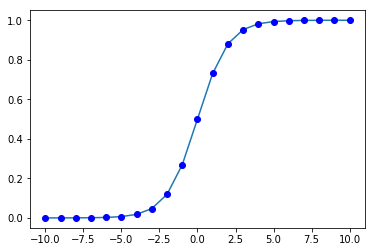

In [40]:
z = np.arange(-10., 11., 1)
sig = sigmoid(z)
plt.plot(z,sig)
plt.plot(z,sig,'bo')
plt.show()

In [0]:
def create_params(n):
    # Create the parameters w and b and initialise them with zeros
    
    # Arguments:
    #    n: number of weights
    #
    # Return values:
    #    w: the weights created  
    #    b: bias term
    
    # Create a numpy array w of shape (n,1) which are initialized to zeros 
    w = np.zeros(shape=(n,1))
    # Initialise bias term b to zero
    b = 0.0
    
    return w,b

In [7]:
#testing parameters
w,b = create_params(2)

print(w)
print(b)

[[0.]
 [0.]]
0.0


In [0]:
#forward propagation
def forward_propagate(X,yhat,w,b):
    # Implement forward propagation
    
    # Arguments:
    #    X    : n features of m training samples represented as an nxm matrix
    #    yhat : the groundtruth values for the m training samples represented as an 1xm matrix
    #    w    : the n weight parameters
    #    b    : the bias term b
    #
    # Return values:
    #    a    : the activation of all the training samples calculated according to the formula above
    #    loss : the loss calculated according to the formula above
    
    
    # Calculate the activation using sigmoid function based on the formula above. You need to store 
    # the activation for all the training elements in an appropriate matrix.
    a = sigmoid(np.dot(w.T,X)+b)
    
    # Calculate the loss using the equation for L above
    loss = -1*(np.sum(((yhat*np.log(a))+(1-yhat)*np.log(1-a)))/X.shape[1])
    
    return a,loss

In [9]:
#testing
w = np.array([[0], [1]])
b = 2
X = np.array([[1, 3, 5],[2, 4, 6]]) 
yhat = np.array([[1, 0, 1]])
a,loss = forward_propagate(X,yhat,w,b)
print(a)
print(loss)

[[0.98201379 0.99752738 0.99966465]]
2.006987006476161


In [0]:
#backward propagation
def backward_propagate(X,yhat,a):
    # Implement backward propagation using the equations above without using any loops
    
    # Arguments:
    #    X    : n features of m training samples represented as an nxm matrix
    #    yhat : the groundtruth values for the m training samples represented as an 1xm matrix
    #    a    : the activation of the training samples
    #
    # Return values:
    #    dw   : derivative of loss with respect to w
    #    db   : derivative of loss with respect to b
    
    # Determine the number of trainining samples m from the shape of X
    m = X.shape[1]
    # Calculate dw = dL/dw using the equation above without using any loops
    dw = np.dot(X,(a-yhat).T)/m
    # Calculate db = dL/db using the equation above without using any loops
    db = np.sum(a-yhat)/m
    
    #return derivative of loss with respect to w and b, i.e., dw and db
    return dw,db

In [11]:
#testing
w = np.array([[0], [1]])
b = 2
X = np.array([[1, 3, 5],[2, 4, 6]]) 
yhat = np.array([[1, 0, 1]])
dw,db = backward_propagate(X,yhat,a)
print(dw)
print(db)

[[0.99097306]
 [1.317375  ]]
0.3264019389169358


In [0]:
#fit function
def fit(X,yhat,numiter=5000,lr=0.05,display_loss = False):
    # Implement the fit fuction that determines optimal values for the parameters w and b using gradient descent.
    
    # Arguments:
    #    X            : n features of m training samples represented as an nxm matrix
    #    yhat         : the groundtruth values for the m training samples represented as an 1xm matrix
    #    numiter      : number of iterations for running the gradient descent 
    #    lr           : learning rate for the gradient descent
    #    display_loss : whether to display loss
    #
    # Return values:
    #    w            : weights determined by the gradient descent
    #    b            : bias determined by the gradient descent
    
    # Determine the number of features from the shape of X
    n = X.shape[0]
    
    # Create the weights and bias
    w,b = create_params(n)
    
    # Iterate for numiter steps
    for i in range(numiter):
        
        # Calculate activation and loss using forward propagation
        a,loss = forward_propagate(X,yhat,w,b)
        
        # Calculate dw and db using backward propagation
        dw,db = backward_propagate(X,yhat,a)
        
        # Calculate the updated parameters by moving a small step (lr) in the opposite direction of the gradient
        w = w - (lr*dw)
        b = b - (lr*db)
        
        if display_loss and i % 100 == 0:
            print(loss)
            
    # Return the parameters w and b
    return w,b

In [13]:
w,b = fit(X,yhat,500,0.005,True)
print(w)
print(b)

0.6931471805599453
0.6450579810362779
0.6445228298368414
0.6440564031501352
0.6436175793664201
[[0.02845113]
 [0.10866157]]
0.08021044325121016


In [0]:
def predict(X,w,b):
    # Implement the function to predict the output for a new input using the learned parameters.
    
    # Arguments:
    #    X    : n features of m training samples represented as an nxm matrix
    #    w    : weights determined by the training
    #    b    : bias determined by the training
    #
    # Return values:
    #    pred : prediction for each test sample
    
    
    # Determine the activation for each input test sample
    act = sigmoid(np.dot(w.T,X)+b)
    
    # Since we are using a binary classifer, the output has to be either a 0 or a 1, so you need
    # to convert the activation to a 0 or a 1.
    pred = np.where(act>0.5,1.0,0.0)
    
    return pred

In [15]:
#testing
w = np.array([[0], [1]])
b = 2
X = np.array([[1, 3, 5],[2, 4, 6]])
pred = predict(X,w,b)
print(pred)

[[1. 1. 1.]]


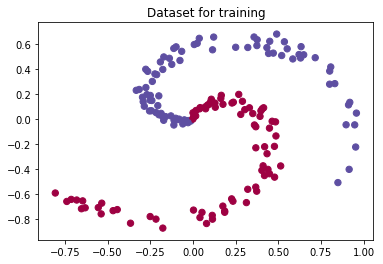

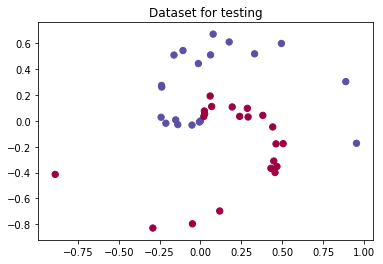

In [28]:
X_train,yhat_train,X_test,yhat_test = utils.create_simple_dataset()

In [29]:
print(X_train.shape)
print(yhat_train.shape)
print(X_test.shape)
print(yhat_test.shape)

(2, 160)
(1, 160)
(2, 40)
(1, 40)


In [0]:
w,b = fit(X_train,yhat_train,5000,0.05)
res = predict(X_test,w,b)

In [31]:
print("Accuracy of prediction: " + str(np.sum(res == yhat_test)/float(res.shape[1])))

Accuracy of prediction: 0.675
